# L3-A - Linear Quantization II: Symmetric vs. Asymmetric Mode

In this lesson, you will learn a different way of performing linear quantization: Symmetric Mode.

In [1]:
import torch

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode

In [2]:
def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()
    q_max = torch.iinfo(dtype).max

    # return the scale
    return r_max/q_max


In [3]:
# Test the implementation on a 4x4 matrix
test_tensor = torch.randn((4,4))

In [4]:
test_tensor

tensor([[ 1.5685,  0.1953, -0.2228,  1.8786],
        [-0.0688,  0.8737, -0.7694, -1.2972],
        [ 2.2583, -0.1225,  0.1297, -0.9487],
        [-0.1908,  0.4945, -0.1941, -0.9259]])

In [5]:
get_q_scale_symmetric(test_tensor)

0.01778228076424186

- Perform Linear Quantization in Symmetric Mode
- `linear_q_with_scale_and_zero_point` is the same function implemented in the previous lesson

In [6]:
from helper import linear_q_with_scale_and_zero_point

In [7]:
def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor, dtype=dtype)
    # In symmetric quantization zero point = 0
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor, scale=scale, zero_point=0, dtype=dtype)

    return quantized_tensor, scale

In [8]:
quantized_tensor, scale = linear_q_symmetric(test_tensor)

### Dequantization

- Perform Dequantization
- Plot the quantization error
- `linear_dequantization` is the same function implemented in the previous lesson

In [9]:
from helper import linear_dequantization, plot_quantization_errors
from helper import quantization_error

In [10]:
dequantized_tensor = linear_dequantization(quantized_tensor, scale=scale, zero_point=0)

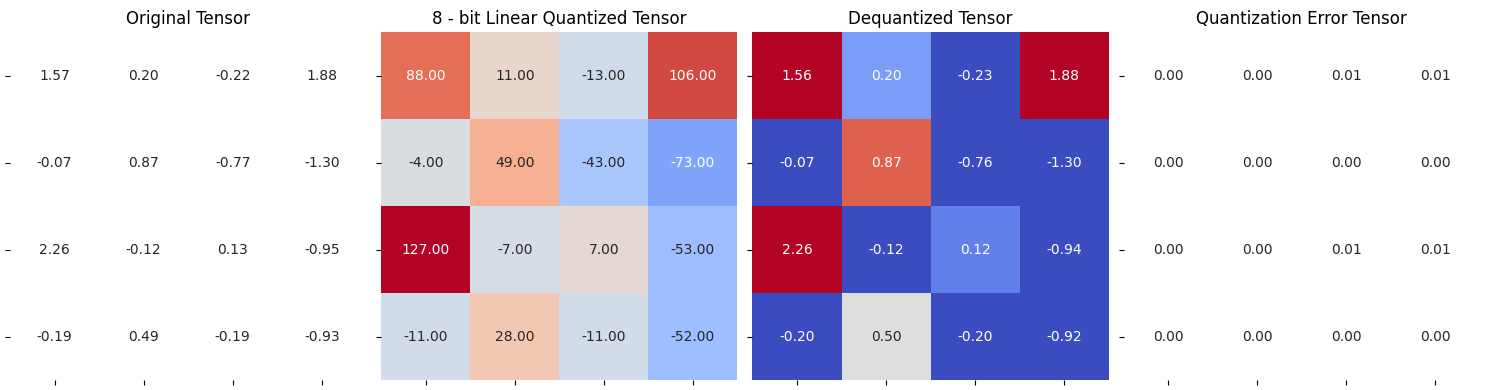

In [11]:
plot_quantization_errors(original_tensor=test_tensor, quantized_tensor=quantized_tensor, dequantized_tensor=dequantized_tensor)

In [12]:
print(f"Quantization Error: {quantization_error(test_tensor, dequantized_tensor=dequantized_tensor)}")

Quantization Error: 1.6592144675087184e-05
